In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv("C:/Users/Mihir S Kagalkar/OneDrive - iiit-b/SEM-5/ML/PROJECT/Hotel-Property-Value-Dataset/train.csv")
test_df  = pd.read_csv("C:/Users/Mihir S Kagalkar/OneDrive - iiit-b/SEM-5/ML/PROJECT/Hotel-Property-Value-Dataset/test.csv")
train_df
#displaying the original data and its size

,Id,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
0,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000.0
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000.0
2,234,20,RL,75.0,10650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128200.0
3,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000.0
4,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432.0
1196,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000.0
1197,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000.0
1198,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950.0


In [4]:
#finding the null entries percentage for every column with a null entry
#train_df.drop_duplicates(inplace=True)
null_value_percentages = (train_df.isna().sum()/train_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

RoadAccessLength           18.583333
ServiceLaneType            93.750000
FacadeType                 58.500000
FacadeArea                  0.583333
BasementHeight              2.416667
BasementCondition           2.416667
BasementExposure            2.500000
BasementFacilityType1       2.416667
BasementFacilityType2       2.416667
ElectricalSystem            0.083333
LoungeQuality              46.666667
ParkingType                 5.416667
ParkingConstructionYear     5.416667
ParkingFinish               5.416667
ParkingQuality              5.416667
ParkingCondition            5.416667
PoolQuality                99.500000
BoundaryFence              80.250000
ExtraFacility              96.166667
dtype: float64

In [5]:
columns_to_drop=null_value_percentages[null_value_percentages>40]
columns_to_drop=columns_to_drop.keys()
columns_to_drop

Index(['ServiceLaneType', 'FacadeType', 'LoungeQuality', 'PoolQuality',
       'BoundaryFence', 'ExtraFacility'],
      dtype='object')

In [6]:
train_df.drop(columns=columns_to_drop,inplace=True)

In [7]:
null_value_percentages = (train_df.isna().sum()/train_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

RoadAccessLength           18.583333
FacadeArea                  0.583333
BasementHeight              2.416667
BasementCondition           2.416667
BasementExposure            2.500000
BasementFacilityType1       2.416667
BasementFacilityType2       2.416667
ElectricalSystem            0.083333
ParkingType                 5.416667
ParkingConstructionYear     5.416667
ParkingFinish               5.416667
ParkingQuality              5.416667
ParkingCondition            5.416667
dtype: float64

In [8]:
train_df.shape

(1200, 75)

In [9]:
train_df.drop_duplicates(inplace=True)


In [10]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
columns_to_impute=null_value_percentages.keys()
columns_to_impute

Index(['RoadAccessLength', 'FacadeArea', 'BasementHeight', 'BasementCondition',
       'BasementExposure', 'BasementFacilityType1', 'BasementFacilityType2',
       'ElectricalSystem', 'ParkingType', 'ParkingConstructionYear',
       'ParkingFinish', 'ParkingQuality', 'ParkingCondition'],
      dtype='object')

In [11]:
for column in columns_to_impute:
	if(train_df[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_df[column].value_counts(dropna=False))
		print("\n\n")

Column:  BasementHeight 	Counts:
 BasementHeight
TA     530
Gd     508
Ex     103
Fa      30
NaN     29
Name: count, dtype: int64



Column:  BasementCondition 	Counts:
 BasementCondition
TA     1072
Gd       59
Fa       39
NaN      29
Po        1
Name: count, dtype: int64



Column:  BasementExposure 	Counts:
 BasementExposure
No     786
Av     181
Gd     107
Mn      96
NaN     30
Name: count, dtype: int64



Column:  BasementFacilityType1 	Counts:
 BasementFacilityType1
Unf    355
GLQ    341
ALQ    181
BLQ    125
Rec    106
LwQ     63
NaN     29
Name: count, dtype: int64



Column:  BasementFacilityType2 	Counts:
 BasementFacilityType2
Unf    1038
Rec      46
LwQ      36
NaN      29
BLQ      23
ALQ      18
GLQ      10
Name: count, dtype: int64



Column:  ElectricalSystem 	Counts:
 ElectricalSystem
SBrkr    1102
FuseA      70
FuseF      24
FuseP       3
NaN         1
Name: count, dtype: int64



Column:  ParkingType 	Counts:
 ParkingType
Attchd     714
Detchd     315
BuiltIn     76
N

In [12]:
columns_to_impute

Index(['RoadAccessLength', 'FacadeArea', 'BasementHeight', 'BasementCondition',
       'BasementExposure', 'BasementFacilityType1', 'BasementFacilityType2',
       'ElectricalSystem', 'ParkingType', 'ParkingConstructionYear',
       'ParkingFinish', 'ParkingQuality', 'ParkingCondition'],
      dtype='object')

In [13]:
train_df["BasementExposure"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BasementFacilityType1"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BasementFacilityType2"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BasementCondition"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
train_df["BasementHeight"].replace(to_replace=np.nan,value="NoBasement",inplace=True)


train_df["ParkingType"].replace(to_replace=np.nan,value="NoParking",inplace=True)
train_df["ParkingConstructionYear"].replace(to_replace=np.nan,value="NoParking",inplace=True)
train_df["ParkingFinish"].replace(to_replace=np.nan,value="NoParking",inplace=True)
train_df["ParkingQuality"].replace(to_replace=np.nan,value="NoParking",inplace=True)
train_df["ParkingCondition"].replace(to_replace=np.nan,value="NoParking",inplace=True)


In [14]:
for column in columns_to_impute:
	if(train_df[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_df[column].value_counts(dropna=False))
		print("\n\n")

Column:  BasementHeight 	Counts:
 BasementHeight
TA            530
Gd            508
Ex            103
Fa             30
NoBasement     29
Name: count, dtype: int64



Column:  BasementCondition 	Counts:
 BasementCondition
TA            1072
Gd              59
Fa              39
NoBasement      29
Po               1
Name: count, dtype: int64



Column:  BasementExposure 	Counts:
 BasementExposure
No            786
Av            181
Gd            107
Mn             96
NoBasement     30
Name: count, dtype: int64



Column:  BasementFacilityType1 	Counts:
 BasementFacilityType1
Unf           355
GLQ           341
ALQ           181
BLQ           125
Rec           106
LwQ            63
NoBasement     29
Name: count, dtype: int64



Column:  BasementFacilityType2 	Counts:
 BasementFacilityType2
Unf           1038
Rec             46
LwQ             36
NoBasement      29
BLQ             23
ALQ             18
GLQ             10
Name: count, dtype: int64



Column:  ElectricalSystem 	Counts:
 El

In [15]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

RoadAccessLength    18.583333
FacadeArea           0.583333
ElectricalSystem     0.083333
dtype: float64

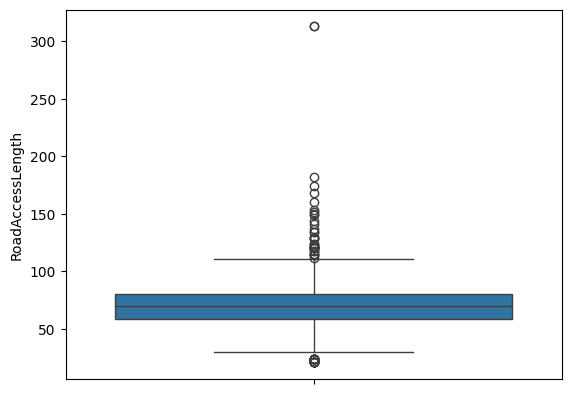

<Figure size 1000x1000 with 0 Axes>

In [16]:
sns.boxplot(train_df["RoadAccessLength"])
plt.figure(figsize=(10, 10))
plt.show()

In [17]:
train_df['RoadAccessLength'].describe()

count    977.000000
mean      70.228250
std       24.886507
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: RoadAccessLength, dtype: float64

In [18]:
# q3=train_df["RoadAccessLength"].quantile(0.75)
# q1=train_df["RoadAccessLength"].quantile(0.25)
# inter_quartile_range=q3-q1
# upper_whisker=q3+inter_quartile_range*1.5
# lower_whisker=q1-inter_quartile_range*1.5
class outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5
  
	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

In [19]:
remover = outlierremoval(train_df["RoadAccessLength"])
train_df["RoadAccessLength"] = train_df["RoadAccessLength"].apply(remover.remove)

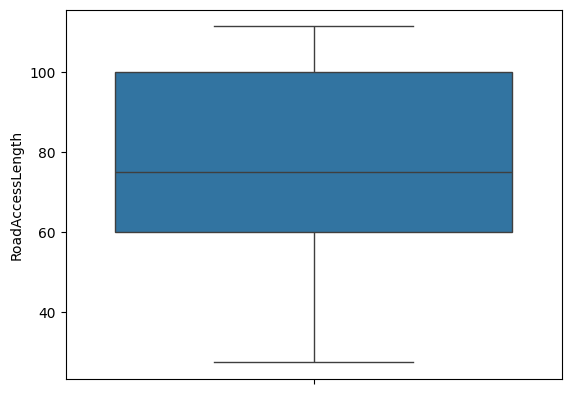

<Figure size 1000x1000 with 0 Axes>

In [20]:
sns.boxplot(train_df["RoadAccessLength"])
plt.figure(figsize=(10, 10))
plt.show()

In [51]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

ElectricalSystem    0.083333
dtype: float64

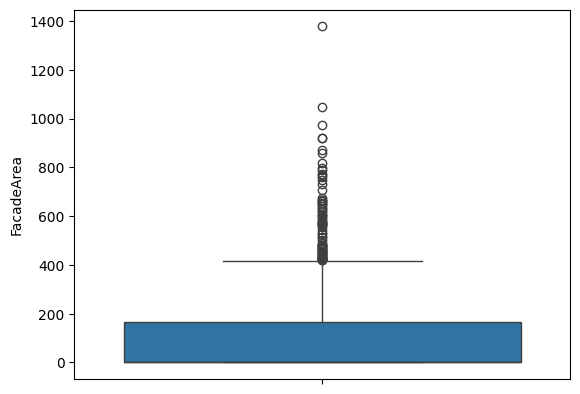

<Figure size 1000x1000 with 0 Axes>

In [22]:
sns.boxplot(train_df["FacadeArea"])
plt.figure(figsize=(10, 10))
plt.show()

In [23]:
train_df['FacadeArea'].describe()


count    1193.000000
mean      103.448449
std       172.339311
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1378.000000
Name: FacadeArea, dtype: float64

In [24]:
remover = outlierremoval(train_df["FacadeArea"])
train_df["FacadeArea"] = train_df["FacadeArea"].apply(remover.remove)

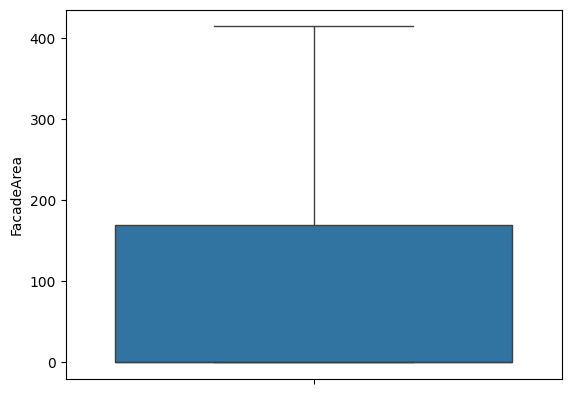

<Figure size 1000x1000 with 0 Axes>

In [25]:
sns.boxplot(train_df["FacadeArea"])
plt.figure(figsize=(10, 10))
plt.show()

In [26]:
train_df['FacadeArea'].describe()

count    1200.000000
mean       93.727500
std       137.154625
min         0.000000
25%         0.000000
50%         0.000000
75%       169.250000
max       415.000000
Name: FacadeArea, dtype: float64

In [27]:
null_value_percentages=(train_df.isna().sum()/train_df.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

ElectricalSystem    0.083333
dtype: float64

In [28]:
train_df['ElectricalSystem'].describe()

count      1199
unique        4
top       SBrkr
freq       1102
Name: ElectricalSystem, dtype: object

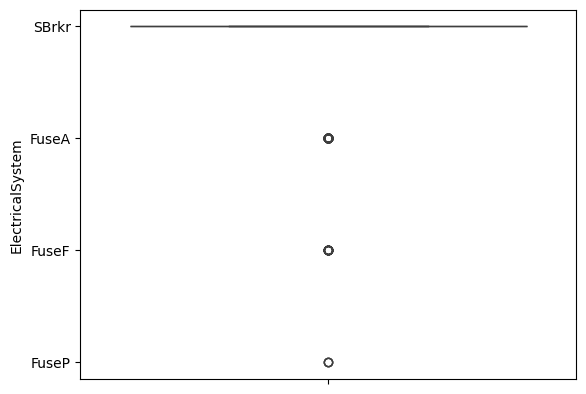

<Figure size 1000x1000 with 0 Axes>

In [29]:
sns.boxplot(train_df["ElectricalSystem"])
plt.figure(figsize=(10, 10))
plt.show()

In [30]:
train_df.shape

(1200, 75)

In [31]:
train_df['RoadAccessLength'].describe()

count    1200.000000
mean       77.086667
std        24.336731
min        27.500000
25%        60.000000
50%        75.000000
75%       100.000000
max       111.500000
Name: RoadAccessLength, dtype: float64

In [32]:
# we will store the categorical data and numerical data to perform different dimension reduction methods on each set 
target_col = 'HotelValue'
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != target_col]
train_label = train_df[target_col]




In [33]:
#We need to encode this data because we cannot process strings 
categorical_cols_encoded = pd.get_dummies(train_df[categorical_cols])
categorical_cols_encoded

,ZoningCategory_C (all),ZoningCategory_FV,ZoningCategory_RH,ZoningCategory_RL,ZoningCategory_RM,RoadType_Grvl,RoadType_Pave,PlotShape_IR1,PlotShape_IR2,PlotShape_IR3,...,DealType_ConLw,DealType_New,DealType_Oth,DealType_WD,DealCondition_Abnorml,DealCondition_AdjLand,DealCondition_Alloca,DealCondition_Family,DealCondition_Normal,DealCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1196,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1197,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1198,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [34]:
#final processed training data
processed_train_df = train_df.copy()
processed_train_df = processed_train_df.drop(columns = ['HotelValue'])
processed_train_df = pd.get_dummies(processed_train_df)
processed_train_df

,Id,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,...,DealType_ConLw,DealType_New,DealType_Oth,DealType_WD,DealCondition_Abnorml,DealCondition_AdjLand,DealCondition_Alloca,DealCondition_Family,DealCondition_Normal,DealCondition_Partial
0,775,20,110.0,14226,8,5,2006,2006,375.0,0,...,False,True,False,False,False,False,False,False,False,True
1,673,20,111.5,11250,6,6,1977,1977,0.0,767,...,False,False,False,True,False,False,False,False,True,False
2,234,20,75.0,10650,5,6,1976,1976,0.0,182,...,False,False,False,True,False,False,False,False,True,False
3,427,80,111.5,12800,7,5,1989,1989,145.0,1518,...,False,False,False,True,False,False,False,False,True,False
4,197,20,79.0,9416,7,5,2007,2007,205.0,1126,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1096,20,78.0,9317,6,5,2006,2006,0.0,24,...,False,False,False,True,False,False,False,False,True,False
1196,1131,50,65.0,7804,4,3,1928,1950,0.0,622,...,False,False,False,True,False,False,False,False,True,False
1197,1295,20,60.0,8172,5,7,1955,1990,0.0,167,...,False,False,False,True,False,False,False,False,True,False
1198,861,50,55.0,7642,7,8,1918,1998,0.0,0,...,False,False,False,True,False,False,False,False,True,False


In [35]:
#let us do the same with the test data
null_value_percentages = (test_df.isna().sum()/test_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

RoadAccessLength           13.846154
ServiceLaneType            93.846154
FacadeType                 65.384615
FacadeArea                  0.384615
BasementHeight              3.076923
BasementCondition           3.076923
BasementExposure            3.076923
BasementFacilityType1       3.076923
BasementFacilityType2       3.461538
LoungeQuality              50.000000
ParkingType                 6.153846
ParkingConstructionYear     6.153846
ParkingFinish               6.153846
ParkingQuality              6.153846
ParkingCondition            6.153846
PoolQuality                99.615385
BoundaryFence              83.076923
ExtraFacility              96.923077
dtype: float64

In [36]:
columns_to_drop=null_value_percentages[null_value_percentages>40]
columns_to_drop=columns_to_drop.keys()
columns_to_drop

Index(['ServiceLaneType', 'FacadeType', 'LoungeQuality', 'PoolQuality',
       'BoundaryFence', 'ExtraFacility'],
      dtype='object')

In [37]:
test_df.drop(columns=columns_to_drop,inplace=True)

In [38]:
null_value_percentages = (test_df.isna().sum()/test_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

RoadAccessLength           13.846154
FacadeArea                  0.384615
BasementHeight              3.076923
BasementCondition           3.076923
BasementExposure            3.076923
BasementFacilityType1       3.076923
BasementFacilityType2       3.461538
ParkingType                 6.153846
ParkingConstructionYear     6.153846
ParkingFinish               6.153846
ParkingQuality              6.153846
ParkingCondition            6.153846
dtype: float64

In [39]:
test_df["BasementExposure"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
test_df["BasementFacilityType1"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
test_df["BasementFacilityType2"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
test_df["BasementCondition"].replace(to_replace=np.nan,value="NoBasement",inplace=True)
test_df["BasementHeight"].replace(to_replace=np.nan,value="NoBasement",inplace=True)


test_df["ParkingType"].replace(to_replace=np.nan,value="NoParking",inplace=True)
test_df["ParkingConstructionYear"].replace(to_replace=np.nan,value="NoParking",inplace=True)
test_df["ParkingFinish"].replace(to_replace=np.nan,value="NoParking",inplace=True)
test_df["ParkingQuality"].replace(to_replace=np.nan,value="NoParking",inplace=True)
test_df["ParkingCondition"].replace(to_replace=np.nan,value="NoParking",inplace=True)

In [40]:
null_value_percentages = (test_df.isna().sum()/test_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

RoadAccessLength    13.846154
FacadeArea           0.384615
dtype: float64

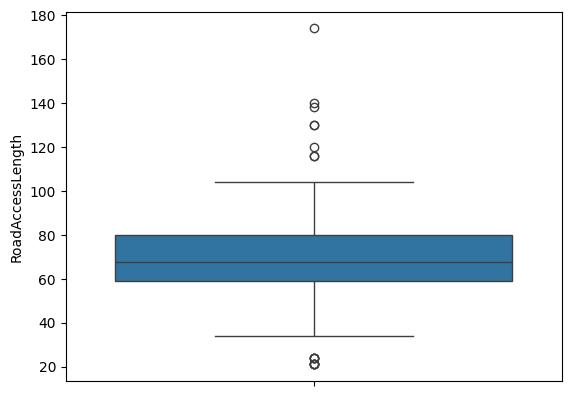

<Figure size 1000x1000 with 0 Axes>

In [41]:
sns.boxplot(test_df["RoadAccessLength"])
plt.figure(figsize=(10, 10))
plt.show()

In [42]:
remover = outlierremoval(test_df["RoadAccessLength"])
test_df["RoadAccessLength"] = test_df["RoadAccessLength"].apply(remover.remove)

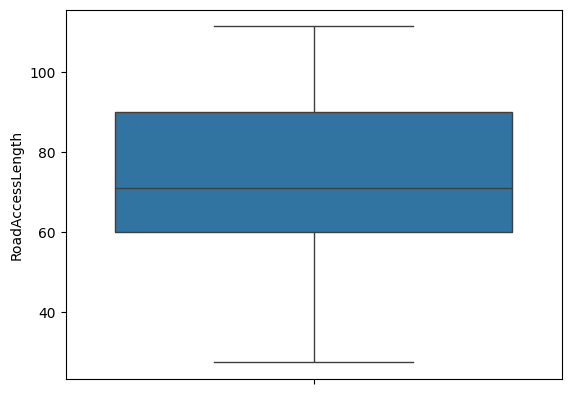

<Figure size 1000x1000 with 0 Axes>

In [43]:
sns.boxplot(test_df["RoadAccessLength"])
plt.figure(figsize=(10, 10))
plt.show()

In [44]:
null_value_percentages = (test_df.isna().sum()/test_df.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

FacadeArea    0.384615
dtype: float64

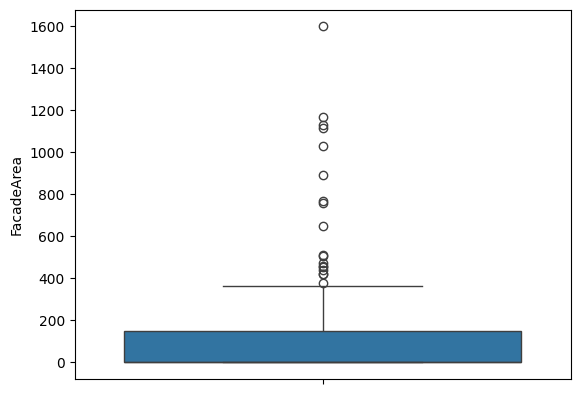

<Figure size 1000x1000 with 0 Axes>

In [45]:
sns.boxplot(test_df["FacadeArea"])
plt.figure(figsize=(10, 10))
plt.show()

In [46]:
remover = outlierremoval(test_df["FacadeArea"])
test_df["FacadeArea"] = test_df["FacadeArea"].apply(remover.remove)

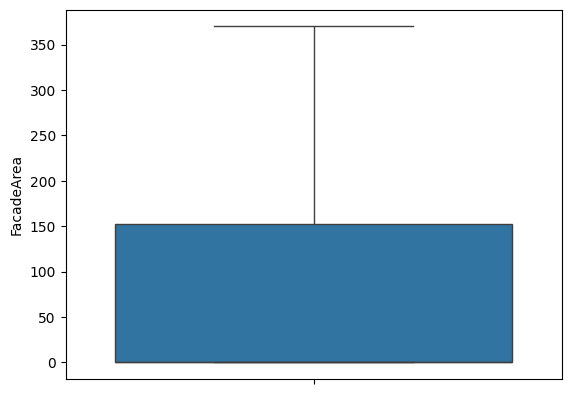

<Figure size 1000x1000 with 0 Axes>

In [47]:
sns.boxplot(test_df["FacadeArea"])
plt.figure(figsize=(10, 10))
plt.show()

In [48]:
#processed_test_df = pd.concat([pd.DataFrame(X_pca_test), test_categorical_cols_encoded.reset_index(drop=True)], axis = 1)
processed_test_df = test_df.copy()
processed_test_df = pd.get_dummies(processed_test_df)
processed_test_df

,Id,PropertyClass,RoadAccessLength,LandArea,OverallQuality,OverallCondition,ConstructionYear,RenovationYear,FacadeArea,BasementFacilitySF1,...,DealType_ConLI,DealType_ConLw,DealType_New,DealType_Oth,DealType_WD,DealCondition_Abnorml,DealCondition_Alloca,DealCondition_Family,DealCondition_Normal,DealCondition_Partial
0,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,False,False,False,False,True,False,False,False,True,False
1,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,...,False,False,False,False,True,False,False,False,True,False
2,414,30,56.0,8960,5,6,1927,1950,0.0,0,...,False,False,False,False,True,False,False,False,True,False
3,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,False,False,False,False,True,False,False,False,True,False
4,1037,20,89.0,12898,9,5,2007,2008,70.0,1022,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1422,120,53.0,4043,6,5,1977,1977,0.0,360,...,False,False,False,False,True,False,False,False,True,False
256,1178,50,111.5,3950,6,8,1926,2004,0.0,468,...,False,False,False,False,True,False,False,False,True,False
257,1292,160,27.5,1680,5,7,1972,1972,268.0,231,...,False,False,False,False,True,False,False,False,True,False
258,782,60,65.0,7153,6,5,1992,1992,0.0,387,...,False,False,False,False,True,False,False,False,True,False


In [49]:
#RUN only ONCE
processed_train_df.columns = processed_train_df.columns.astype(str)
processed_test_df.columns = processed_test_df.columns.astype(str)

#saving the data as a csv file 
processed_train_df.to_csv("Processed_train_data.csv",index = False)
processed_test_df.to_csv("Processed_test_data.csv", index = False)